In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 7, 'axes.linewidth': 1, 'xtick.major.width': 1, 'xtick.major.size': 5, 'ytick.major.width': 1, 'ytick.major.size': 5})
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [2]:
def save_pdf(save_file, fig):
    os.makedirs(os.path.dirname(save_file), exist_ok=True)
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight',dpi=300)
    pdf.close()
    return

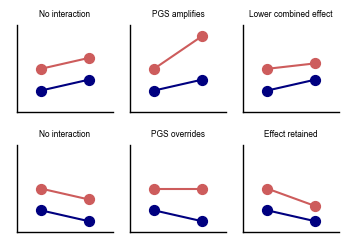

In [9]:
fig, ax = plt.subplots(2,3,figsize=(3.5, 2.5), sharex=True, sharey=True)

y2s = [
    [30, 30, 30],
    [10, 10, 10]
    ]

ms = [
    [1,2,0.75],
    [1,1.5,0.7]
]

titles = [
    ["No interaction", "PGS amplifies", "Lower combined effect"],
    ["No interaction", "PGS overrides", "Effect retained"]
]
for i in range(2):
    for j in range(3):
        x1=20
        x2=30
        y1=20
        y2=y2s[i][j]

        ax[i][j].plot([x1, x2], [y1, y2], color="navy")
        ax[i][j].scatter(x1, y1, color='navy', s=50, zorder=5)
        ax[i][j].scatter(x2, y2, color='navy', s=50, zorder=5)

        d = 20
        m = ms[i][j]
        ax[i][j].plot([x1, x2], [y1+d, y2+d*m], color="indianred")
        ax[i][j].scatter(x1, y1+d, color='indianred', s=50, zorder=5)
        ax[i][j].scatter(x2, y2+d*m, color='indianred', s=50, zorder=5)


        ax[i][j].spines[["top", "right"]].set_visible(False)
        ax[i][j].set_xlim(x1-5, x2+5)
        ax[i][j].set_ylim(0, 80)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(titles[i][j], fontsize=6);

fig.tight_layout()

In [10]:
save_pdf("../data/pgs_interaction/schematic.pdf", fig)